In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("tx_log.csv")
df2 = pd.read_csv("../../e2sensectr.txt", names=["timestamp_us", "payload"], sep="\t")

# Calcular timepos entre llegadas
df["delta_t_s"] = df["timestamp_ns"].diff() * 1e-9
df["delta_t_s"] = df["delta_t_s"].fillna(0)  # Avoid inplace=True

df2["delta_t_s"] = df2["timestamp_us"].diff() * 1e-6
df2["delta_t_s"] = df2["delta_t_s"].fillna(0)  # Avoid inplace=True

# Calcular tasa instantánea
df["rate_Mbps"] = (df["packet_size_bytes"] * 8) / (df["delta_t_s"] * 1e6)
df.loc[df["delta_t_s"] == 0, "rate_Mbps"] = 0

df2["rate_Mbps"] = (df2["payload"] * 8) / (df2["delta_t_s"] * 1e6)
df2.loc[df2["delta_t_s"] == 0, "rate_Mbps"] = 0

# ejex
t10 = df["timestamp_ns"].iloc[0]
df["time_s"] = (df["timestamp_ns"] - t10) * 1e-9

t20 = df2["timestamp_us"].iloc[0]
df2["time_s"] = (df2["timestamp_us"] - t20) * 1e-6

window_size = 25  # ventana de muestras
df["rate_smooth"] = df["rate_Mbps"].rolling(window=window_size, min_periods=1, center=True).mean()
df2["rate_smooth"] = df2["rate_Mbps"].rolling(window=window_size, min_periods=1, center=True).mean()

plt.figure(figsize=(12,5))
plt.plot(df["time_s"], df["rate_Mbps"], color='lightgray', linestyle='-', marker='o', markersize=3, label="Instantaneous PC")
plt.plot(df["time_s"], df["rate_smooth"], color='black', linewidth=2, label=f"Smooth (window={window_size}) PC")

# plt.plot(df2["time_s"], df2["rate_Mbps"], color='lightblue', linestyle='-', marker='o', markersize=3, label="Instantaneous E2")
# plt.plot(df2["time_s"], df2["rate_smooth"], color='blue', linewidth=2, label=f"Smooth (window={window_size} E2)")

plt.title("Tx Rate")
plt.xlabel("Time (s)")
plt.ylabel("Thput (Mbps)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


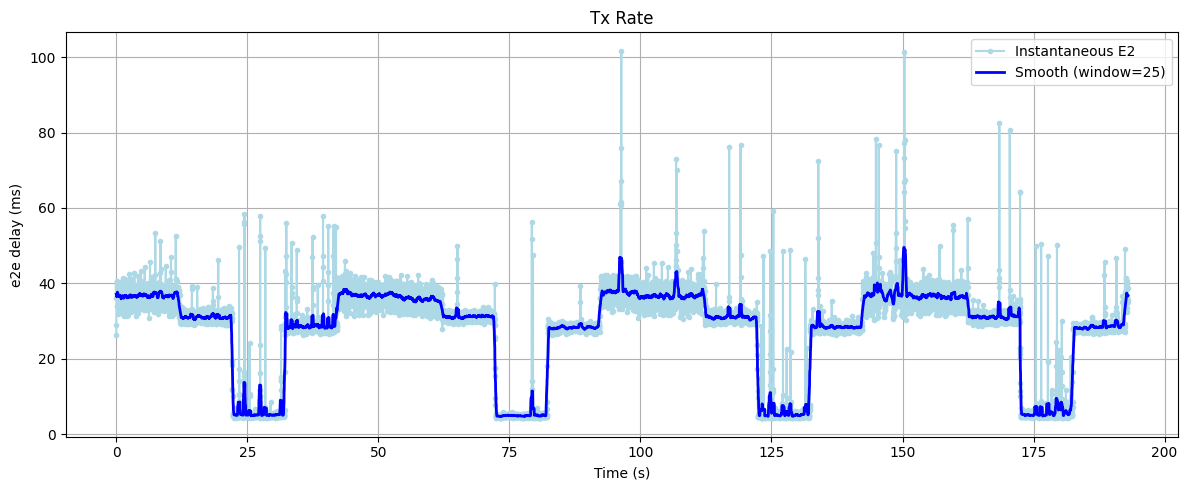

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt




df2 = pd.read_csv(
    "../../xappsensectr.txt",
    names=["timestamp_us", "time_ms"],
    sep=r"\s+",
    engine="python",
    on_bad_lines="skip",
  
)


df2 = df2.dropna()
df2 = df2.apply(pd.to_numeric, errors="coerce").dropna()


if not df2.empty:
    t0 = df2["timestamp_us"].iloc[0]
    df2["time_s"] = (df2["timestamp_us"] - t0)*1e-6
else:
    raise ValueError("El DataFrame está vacío; revisa el archivo de entrada.")

window_size = 25
df2["time_ms_smooth"] = (
    df2["time_ms"].rolling(window=window_size, min_periods=1, center=True).mean()
)


plt.figure(figsize=(12, 5))
plt.plot(df2["time_s"], df2["time_ms"]/1000, color='lightblue', linestyle='-', marker='o', markersize=3, label="Instantaneous E2")
plt.plot(df2["time_s"], df2["time_ms_smooth"]/1000, color='blue', linewidth=2, label=f"Smooth (window={window_size})")

df2["time_ms"] = df2["time_ms"]/1000
df2["time_ms_smooth"] =  df2["time_ms_smooth"]/1000
plt.title("Tx Rate")
plt.xlabel("Time (s)")
plt.ylabel("e2e delay (ms)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

df2.to_csv("delay_car_ctrl.txt", sep="\t", index=False, float_format="%.3f", columns=["time_s", "time_ms", "time_ms_smooth"])




